In [2]:
import pandas as pd
import matplotlib as matplt
import squarify
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 7.5]

 ## Importacion de la base de datos

In [3]:
data = pd.read_csv("synergy_logistics_database.csv")
data['date'] = pd.to_datetime(data['date'])
data

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,2015-01-31,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,2015-01-02,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,2015-02-02,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,2015-03-02,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,2015-04-02,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...,...
19051,19052,Imports,Japan,Singapore,2020,2020-06-27,Gas turbines,Sea,Union Energy Co,1000000
19052,19053,Imports,Malaysia,Singapore,2020,2020-06-28,Gas turbines,Sea,Union Energy Co,2000000
19053,19054,Imports,Malaysia,Singapore,2020,2020-06-29,Gas turbines,Sea,Union Energy Co,33000000
19054,19055,Imports,Malaysia,Singapore,2020,2020-06-30,Gas turbines,Sea,Union Energy Co,13000000


## Info del tipo de datos que pandas detecta
* no necesita limpieza pq los datos estan completos

### Del método *nunique()* podemos observar y plantearnos ciertas preguntas:

   * **19056 registros** de transporte a lo largo de 6 años
   * de **6 años de actividades** se operaron 912 dias, lo equivalente a **2 años y medio**, seria interesante revisar las fechas de mas actividad y preguntarnos 
       + *¿se podran predecir y destinar recursos a ciertas operaciones?*
   * se han transportado 28 tipos diferentes de productos
   * se opera para 77 compañias diferentes: 
       + *¿se podria guiar la estrategia a las compañias que generan mas valor?*
   <br><br>
   * En los ultimos seis años se han transportado **$ 215,691,298,000**

In [4]:
valor_total_hist = data["total_value"].sum()

In [5]:
data.nunique()

register_id       19056
direction             2
origin               23
destination          34
year                  6
date                912
product              28
transport_mode        4
company_name         77
total_value         248
dtype: int64

In [6]:
data['direction'].value_counts()

Exports    15408
Imports     3648
Name: direction, dtype: int64

Valor Importaciones: % 19.143576826196472
Valor Exportaciones: % 80.85642317380352


<AxesSubplot:title={'center':'Cantidad total de importaciones y exportaciones'}, ylabel='direction'>

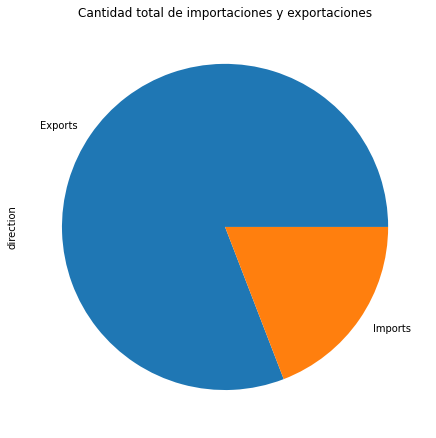

In [7]:
print("Valor Importaciones: % {}".format(data['direction'].value_counts().Imports * 100 / 19056))
print("Valor Exportaciones: % {}".format(data['direction'].value_counts().Exports * 100 / 19056))
data['direction'].value_counts().plot(kind='pie',title='Cantidad total de importaciones y exportaciones')

In [8]:
data.groupby(['direction'])['total_value'].sum()

direction
Exports    160163298000
Imports     55528000000
Name: total_value, dtype: int64

Valor Importaciones: % 25.744200398849657
Valor Exportaciones: % 74.25579960115034


<AxesSubplot:title={'center':'Porcentaje de rutas mas valiosas por Importacion/Exportacion'}, ylabel='total_value'>

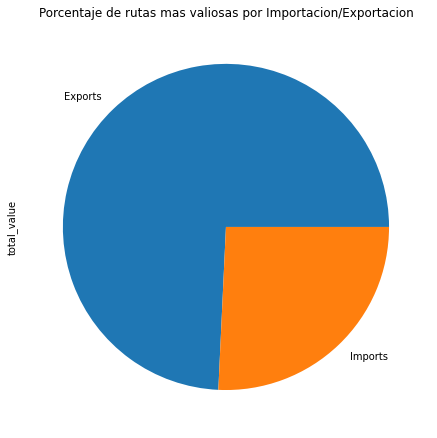

In [9]:
print("Valor Importaciones: % {}".format(data.groupby(['direction'])['total_value'].sum().Imports * 100 / valor_total_hist))
print("Valor Exportaciones: % {}".format(data.groupby(['direction'])['total_value'].sum().Exports * 100 / valor_total_hist))
data.groupby(['direction'])['total_value'].sum().plot(kind='pie',title='Porcentaje de rutas mas valiosas por Importacion/Exportacion')

### Rutas mas populares
#### Estas rutas representan el %80 del total de rutas trabajadas en los ultimos 6 años - 85 Rutas

<AxesSubplot:title={'center':'Rutas mas populares (80%)'}, xlabel='origin,destination'>

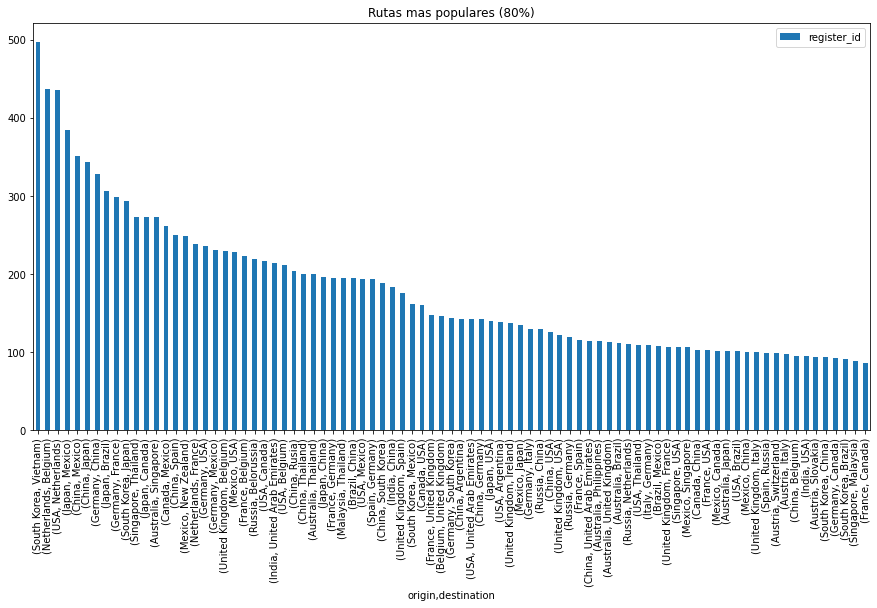

In [25]:
rutas_populares = data.groupby(['origin','destination'])['register_id'].count().reset_index().sort_values(['register_id'],ascending=False).set_index(["origin","destination"])
rutas_populares.cumsum().loc[rutas_populares.cumsum()['register_id'] < 19056 * .8 ]
rutas_populares.iloc[:85].plot(kind='bar',title='Rutas mas populares (80%)')

### Rutas mas valiosas
#### Estas rutas representan el %80 del total de rutas trabajadas en los ultimos 6 años - 54 rutas 

<AxesSubplot:xlabel='origin,destination'>

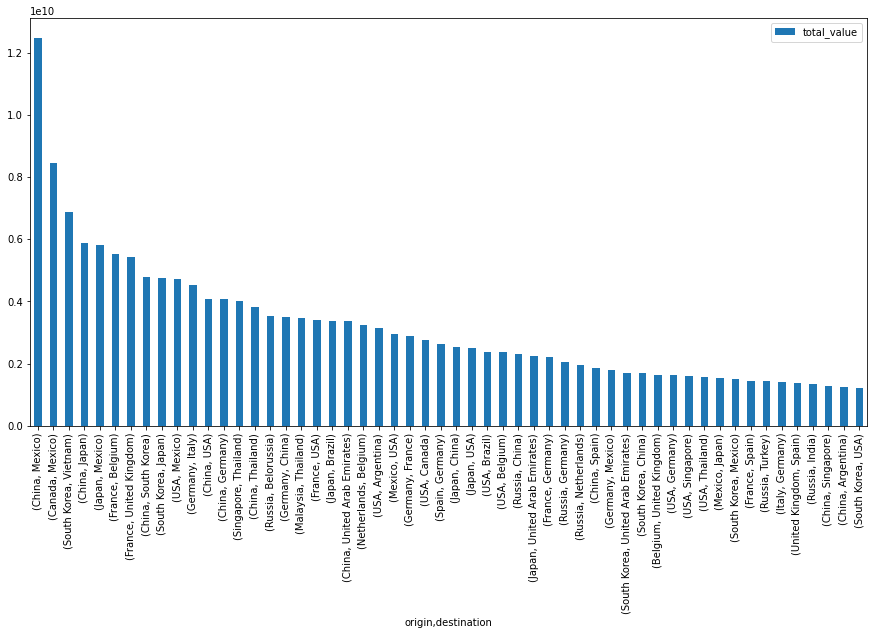

In [11]:
data.groupby(['origin','destination'])['total_value'].sum()
rutas_mas_valiosas = data.groupby(['origin','destination'])['total_value'].sum().reset_index().sort_values(['total_value'],ascending=False).set_index(["origin","destination"])
#rutas_mas_valiosas
rutas_mas_valiosas.loc[rutas_mas_valiosas.cumsum()['total_value'] < valor_total_hist * .8 ].plot(kind='bar')

In [41]:
##-> aqui me quede, hay que acceder a la columna de los paises de origen para obtener una
##lista de los paises en los cuales enfocarse
rutas_mas_valiosas.reset_index().loc[:54,['origin']].value_counts()#.iloc[:11].plot.pie()

origin        
China             10
USA                8
Japan              6
Russia             6
South Korea        6
France             5
Germany            4
Mexico             2
Belgium            1
Canada             1
Italy              1
Malaysia           1
Netherlands        1
Singapore          1
Spain              1
United Kingdom     1
dtype: int64

<AxesSubplot:title={'center':'RUTAS\nmas valiosas VS mas populares'}, xlabel='origin,destination'>

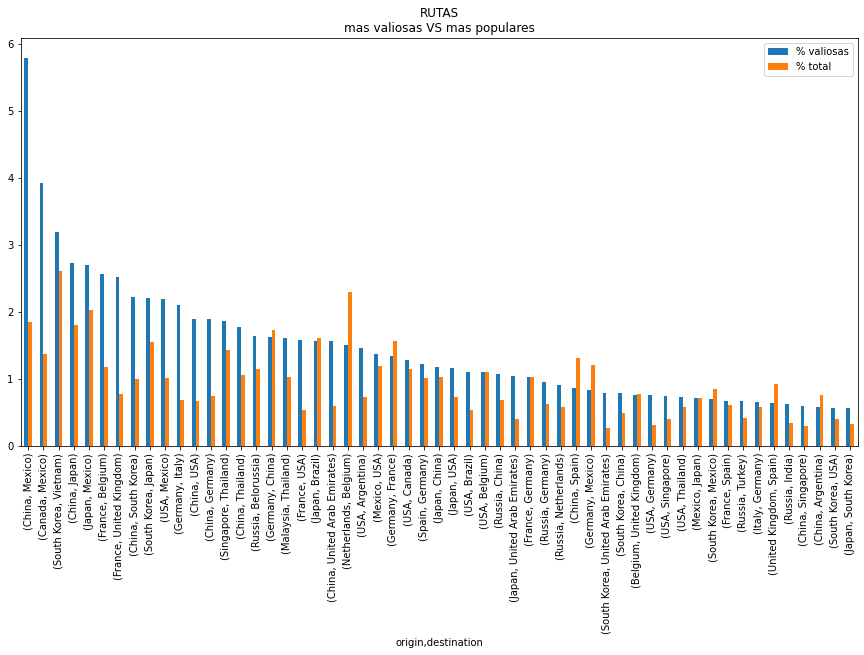

In [43]:
resumen_rutas = pd.concat([rutas_mas_valiosas,rutas_populares],axis=1)#.iloc[:54].plot.bar()
resumen_rutas['% valiosas'] = 100 * resumen_rutas['total_value'] / valor_total_hist 
resumen_rutas['% total'] = 100 * resumen_rutas['register_id'] / 19056 
resumen_rutas.loc[:,['% valiosas','% total']].reset_index().sort_values(['% valiosas'],ascending=False).set_index(["origin","destination"]).iloc[:55].plot(kind='bar',title='RUTAS\nmas valiosas VS mas populares')

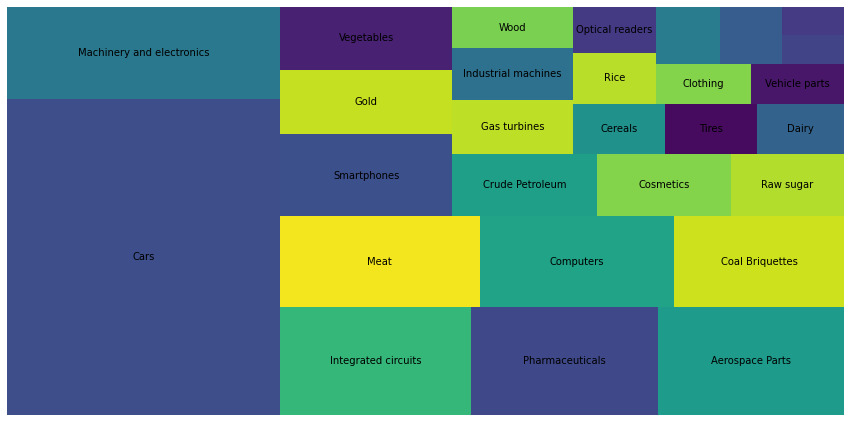

In [14]:
data['product'].value_counts()
squarify.plot(sizes=data['product'].value_counts(), label=data['product'].value_counts().index[:-4])
plt.axis('off')
plt.show()

array([<AxesSubplot:ylabel='transport_mode'>], dtype=object)

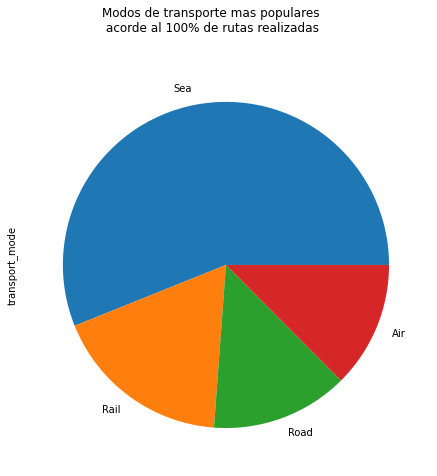

In [26]:
data['transport_mode'].value_counts(normalize=True).plot(kind='pie',subplots=True,title='Modos de transporte mas populares \n acorde al 100% de rutas realizadas ')

In [55]:
data.groupby(['company_name'])['total_value'].sum().sort_values(ascending=False)[data.groupby(['company_name'])['total_value'].sum().sort_values(ascending=False).cumsum()<=valor_total_hist*.8]

company_name
Lenovo Group Ltd              16203000000
Boeing Company                10215140000
Cubist Pharma F               10163147000
PAO Gazprom                    8731000000
Honda                          8527619000
LG Electronics Inc             8203115000
Technology & Innovation Co     7848000000
Xiaomi Corp                    7666020000
Caterpillar Inc                7282000000
L Oreal Co                     6138168000
Huawei Technologies Co         5745026000
Kinross Gold‎ Co               5546000000
Black Forest Wood Co           5138000000
Diet Prom LLC                  4492000000
Kumho Tyre Co                  4297000000
Auto Parts It S.R.L            4237066000
Sawan Ltd                      4017000000
Chaiyaphum Electronics Ltd     3831000000
Meat Beleggingen Bv            3775226000
Shenzhen DJS Co Ltd            3660000000
 Ma & Electronics Ltd          3516181000
Green Oil Thailand Co          3482000000
DSD Design&Motor               3418000000
Bayer AG             

<AxesSubplot:title={'center':'Empresas que aportan el 80% del valor den las rutas'}, xlabel='company_name'>

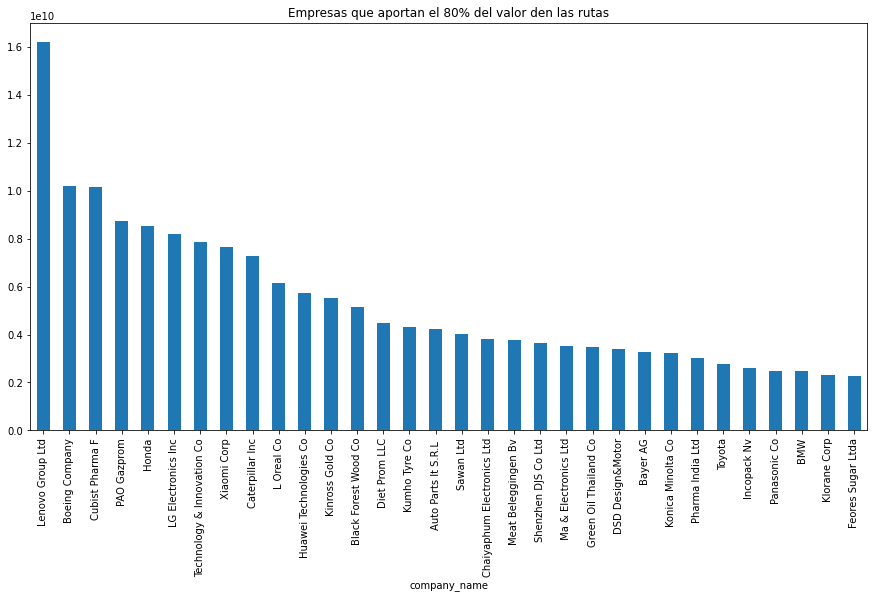

In [52]:
data.groupby(['company_name'])['total_value'].sum().sort_values(ascending=False)[data.groupby(['company_name'])['total_value'].sum().sort_values(ascending=False).cumsum()<=valor_total_hist*.8].plot.bar(title="Empresas que aportan el 80% del valor den las rutas")